## Chapter 10 Gated Recurrent Unit

Over the past few years, the Gated Recurrent Unit
(GRU) has emerged as an exciting new tool for modeling
time-series data. They **have fewer parameters than
LSTM but often deliver similar or superior performance**. Just
like the LSTM the GRU controls the flow of information, **but
without the use of a memory unit.** Rather than a separate cell state, **the GRU uses
the hidden state** as memory. It also merges the forget input gates into a single “update” gate.

It contains an **update gate (z)** and **reset gate (r).**
- The **reset gate** determines how to combine the new input
with previous memory. It gives the model the
ability to block or pass information from the previous hidden
state. The reset gate is applied
directly to the previous hidden state. If the reset gate is set to 0, it ignores previous
memory. This behavior allows a GRU to drop information
that is irrelevant. 
- The update gate defines how much of the previous memory
to use in the present. It controls
how much of the past hidden state is relevant at time t
by controlling how much of the previous memory content is to
be forgotten and how much of the new memory content is to
be added. Whenever memory content is considered to be important for
later use, the update gate will be closed. This allows the GRU
to carry the current memory content across multiple time-steps
and thereby capture long term dependencies.
The final memory or activation $h_t$ is a weighted combination
of the current new memory content eht and previous memory
activation $h_{t−1}$, where the weights are determined by the value
of the update gate $z_t$.

Together these gates give the model the ability to explicitly
save information over many time-steps.

**Note:**  The GRU is designed to adaptively reset or update
its memory content.

In a GRU the hidden activation (final memory) is simply a linear
interpolation of the previous hidden activation (new memory
content), with weights determined by the update gate.

In [8]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing

from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.layers.recurrent import GRU

c:\users\ctw00071\appdata\local\continuum\miniconda3\envs\neuralnets\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
c:\users\ctw00071\appdata\local\continuum\miniconda3\envs\neuralnets\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


## Data Transformation

In [9]:
loc = "SN_m_tot_V2.0.csv"
data_csv = pd.read_csv(loc,sep=";",header=None)

yt = data_csv.iloc [0:3210 ,3]
## Adding Time Lags to Data
yt_1 = yt.shift(1)
yt_2 = yt.shift(2)
yt_3 = yt.shift(3)
yt_4 = yt.shift(4)
yt_5 = yt.shift(5)

## Build a dataframe with the time lags
data = pd.concat([yt, yt_1, yt_2, yt_3, yt_4, yt_5], axis=1)
data.columns =['yt', 'yt_1', 'yt_2', 'yt_3', 'yt_4', 'yt_5']

data= data.dropna()

y = data['yt']
cols = ['yt_1', 'yt_2', 'yt_3', 'yt_4', 'yt_5']
x = data[cols]

scaler_x = preprocessing.MinMaxScaler(feature_range = (-1,1))
x = np.array(x).reshape((len(x),5))
x = scaler_x.fit_transform(x)

scaler_y = preprocessing.MinMaxScaler(feature_range = (-1,1))
y = np.array(y).reshape((len(y),1))
y = scaler_y.fit_transform(y)

train_end = 3042
x_train = x[0:train_end,]
x_test = x[train_end+1:3205,]
y_train = y[0:train_end]
y_test = y[train_end+1:3205]

x_train =np.array(x_train).reshape(x_train.shape + (1,))
x_test = np.array(x_test).reshape(x_test.shape + (1,))

In [11]:
seed = 2016
np.random.seed(seed)

In [12]:
fit1 = Sequential()
fit1.add(GRU(output_dim=4, 
             activation='tanh', 
             inner_activation='hard_sigmoid', 
             input_shape=(5,1), 
             return_sequences=False)) #For multiple targets it can be set to True.
fit1.add(Dense(output_dim=1, activation='linear'))
fit1.compile(loss='mean_squared_error', optimizer = 'rmsprop')
## changing shuffle from False to True we can improve our model
fit1.fit(x_train,y_train,batch_size=1, nb_epoch=10, shuffle=True)

print(fit1.summary ())

W0221 16:23:48.482298 26008 deprecation_wrapper.py:119] From c:\users\ctw00071\appdata\local\continuum\miniconda3\envs\neuralnets\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

c:\users\ctw00071\appdata\local\continuum\miniconda3\envs\neuralnets\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `GRU` call to the Keras 2 API: `GRU(activation="tanh", input_shape=(5, 1), return_sequences=False, units=4, recurrent_activation="hard_sigmoid")`
  
W0221 16:23:48.529531 26008 deprecation_wrapper.py:119] From c:\users\ctw00071\appdata\local\continuum\miniconda3\envs\neuralnets\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0221 16:23:48.536535 26008 deprecation_wrapper.py:119] From c:\users\ctw00071\appdata\local\continuum\miniconda3\envs\neuralnets\lib\site-packages\keras\b

Epoch 1/10
3042/3042 [==============================] - 9s 3ms/step - loss: 0.0309
Epoch 2/10
3042/3042 [==============================] - 8s 3ms/step - loss: 0.0215
Epoch 3/10
3042/3042 [==============================] - 8s 3ms/step - loss: 0.0203
Epoch 4/10
3042/3042 [==============================] - 8s 3ms/step - loss: 0.0198
Epoch 5/10
3042/3042 [==============================] - 9s 3ms/step - loss: 0.0194
Epoch 6/10
3042/3042 [==============================] - 8s 3ms/step - loss: 0.0191
Epoch 7/10
3042/3042 [==============================] - 7s 2ms/step - loss: 0.0190
Epoch 8/10
3042/3042 [==============================] - 7s 2ms/step - loss: 0.0188
Epoch 9/10
3042/3042 [==============================] - 8s 3ms/step - loss: 0.0188
Epoch 10/10
3042/3042 [==============================] - 8s 3ms/step - loss: 0.0186
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_1 (GRU)                  (None, 4

<Figure size 432x288 with 0 Axes>

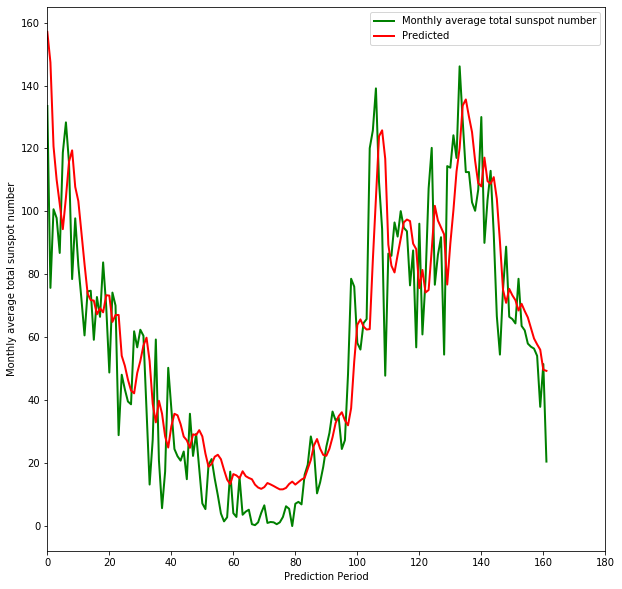

In [13]:
pred1 = fit1.predict(x_test)
pred1 = scaler_y.inverse_transform(np.array(pred1).reshape((len(pred1),1)))

actual1 = scaler_y.inverse_transform(np.array(y_test).reshape((len(y_test),1)))

fig = plt.figure()

plt.figure(figsize=(10,10))

x_values = np.arange(len(pred1))
plt.plot(x_values, actual1, 'g-', linewidth=2, markersize=12)
plt.plot(x_values, pred1, 'r-', linewidth=2, markersize=12)
plt.xlim(0,180)
plt.xlabel('Prediction Period')
plt.ylabel('Monthly average total sunspot number')
plt.legend(('Monthly average total sunspot number', 'Predicted'),loc='upper right')

In [14]:
x[1]

array([-0.30085384, -0.28829734, -0.53390256, -0.41386238, -0.47614264])

We can also use **multiple time steps to make the prediction** for
the next time step. In this case, you would reshape the input
data so that it has the form 
- [examples, features=1, timesteps=5].

In [15]:
train_end = 3042
x_train = x[0:train_end,]
x_test = x[train_end+1:3205,]
y_train = y[0:train_end]
y_test = y[train_end+1:3205]

# the reshape changed for this purpose
x_train =np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
x_test = np.reshape(x_test,(x_test.shape[0],1,x_test.shape[1]))

You can see that we have reshaped the data to have 5 time
steps with 1 feature.

In [17]:
print(" Shape of x_train is ", x_train.shape)
print(" Shape of x_test is ", x_test.shape)

 Shape of x_train is  (3042, 1, 5)
 Shape of x_test is  (162, 1, 5)


In [24]:
seed =2016
num_epochs =1
np.random.seed(seed)

fit1 = Sequential()
fit1.add(GRU(output_dim =4,
             activation ='tanh',
             inner_activation = 'hard_sigmoid',
             input_shape = (1,5)))

fit1.add(Dense(output_dim =1, activation = 'linear'))
fit1.compile(loss='mean_squared_error', optimizer = 'rmsprop')
fit1.fit( x_train , y_train , batch_size =1, nb_epoch = num_epochs )

c:\users\ctw00071\appdata\local\continuum\miniconda3\envs\neuralnets\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `GRU` call to the Keras 2 API: `GRU(activation="tanh", input_shape=(1, 5), units=4, recurrent_activation="hard_sigmoid")`
  if __name__ == '__main__':
c:\users\ctw00071\appdata\local\continuum\miniconda3\envs\neuralnets\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="linear", units=1)`
  # This is added back by InteractiveShellApp.init_path()
c:\users\ctw00071\appdata\local\continuum\miniconda3\envs\neuralnets\lib\site-packages\ipykernel_launcher.py:13: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  del sys.path[0]


Epoch 1/1
3042/3042 [==============================] - 5s 2ms/step - loss: 0.0239


However, the model appears to consistently
predict a higher number of Sunspots than actually observed.
Since the model has not been optimized, performance could be
improved with a little parameter tweaking.

<Figure size 432x288 with 0 Axes>

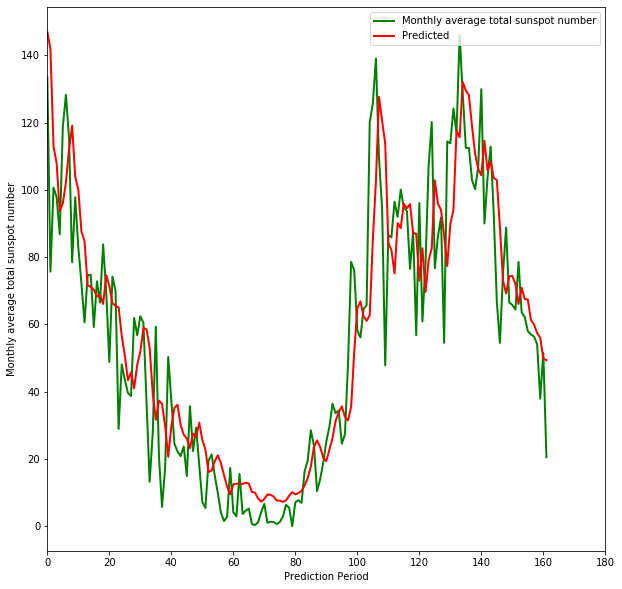

In [25]:
pred1 = fit1.predict(x_test)
pred1 = scaler_y.inverse_transform(np.array(pred1).reshape((len(pred1),1)))

actual1 = scaler_y.inverse_transform(np.array(y_test).reshape((len(y_test),1)))

fig = plt.figure()

plt.figure(figsize=(10,10))

x_values = np.arange(len(pred1))
plt.plot(x_values, actual1, 'g-', linewidth=2, markersize=12)
plt.plot(x_values, pred1, 'r-', linewidth=2, markersize=12)
plt.xlim(0,180)
plt.xlabel('Prediction Period')
plt.ylabel('Monthly average total sunspot number')
plt.legend(('Monthly average total sunspot number', 'Predicted'),loc='upper right')